In [2]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import math
#from all_libs import pd, np, dt, plt, math

In [4]:
# Parameters:
file_quotes = "FITP_ALLQ"
file_curncy = 'RUB' # 'KZT'
isin        = 'XS2063279959' # XS0088543193 XS2063279959 XS1120709826
diff_period = 1 # preiod of currency change calculations (1 period = 10 sec)
spread_period = 60 # in minutes - calc currency volatility over that period
spread_step = 1/8 # 1/16
spread_base = 4/8
crncy_param = 'max_chg' # 'vol_per'
min_crncy_vol = 0.0003
max_crncy_vol = 0.0030
step_crncy_vol= 0.0003

In [5]:
# # Parameters:
# file_quotes = "FITP_ALLQ"
# file_curncy = 'RUB'
# isin        = 'XS2063279959' # XS0088543193 XS2063279959 XS1120709826
# diff_period = 1 # preiod of currency change calculations (1 period = 10 sec)
# spread_period = 30 # in minutes - calc currency volatility over that period
# spread_step = 1/16
# spread_base = 6/8
# crncy_param = 'max_chg' # 'vol_per'
# min_crncy_vol = 0.0003
# max_crncy_vol = 0.0030
# step_crncy_vol= 0.0003

In [6]:
my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
all_quotes = pd.read_csv(file_quotes+'.csv', sep=';', parse_dates=['quoteDateTime'], date_parser=my_date_parser)
all_quotes

<ipython-input-6-1f9aa023acef>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")


,id,isin,quoteDateTime,bid,bidSize,ask,askSize
0,6798205,RU000A0JV4L2,2020-05-18 17:32:39,105.000,50000000,105.500,50000000
1,6798206,RU000A0JX0H6,2020-05-18 17:33:01,102.400,50000000,102.650,50000000
2,6798208,XS1577961516,2020-05-18 17:40:04,101.000,500000,102.000,500000
3,6797968,RU000A0JXFM1,2020-05-18 17:40:10,118.600,50000000,118.850,50000000
4,6798091,XS2010044381,2020-05-18 17:40:11,97.500,500000,99.000,500000
...,...,...,...,...,...,...,...
16554,354720231,XS0559915961,2021-05-18 18:31:36,117.125,500000,117.875,500000
16555,354720232,XS0559915961,2021-05-18 18:31:38,117.250,500000,117.875,500000
16556,354722071,XS2099763075,2021-05-18 18:48:05,102.000,500000,103.000,500000
16557,354722076,XS2099763075,2021-05-18 18:48:07,102.250,500000,103.000,500000


In [8]:
my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
curncy = pd.read_csv(file_curncy+'.csv', sep=';', parse_dates=['Dates'], date_parser=my_date_parser).rename(columns={"USDRUB Curncy":"rub", " Bid ":"rub"})
curncy

<ipython-input-8-6c8e0d2cea92>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")


,Dates,rub
0,2020-11-05 10:00:50,78.5105
1,2020-11-05 10:01:00,78.5267
2,2020-11-05 10:01:10,78.4718
3,2020-11-05 10:01:20,78.4160
4,2020-11-05 10:01:30,78.4296
...,...,...
664535,2021-05-19 16:17:50,73.7775
664536,2021-05-19 16:18:00,73.7789
664537,2021-05-19 16:18:10,73.7816
664538,2021-05-19 16:18:20,73.7863


In [9]:
my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
cbbt = pd.read_csv(isin+"_CBBT.csv", sep=';', parse_dates=['Dates'], date_parser=my_date_parser)
cbbt['Date'] = cbbt['Dates']
cbbt = cbbt.set_index('Dates').rename(columns={'BID':'bid_cbbt', 'Bid':'bid_cbbt','Ask':'ask_cbbt','ASK':'ask_cbbt'})
cbbt

<ipython-input-9-1c13fddbab5e>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")


,bid_cbbt,ask_cbbt,Date
Dates,,,
2020-11-09 11:00:00,99.268,100.231,2020-11-09 11:00:00
2020-11-09 11:00:10,99.267,100.231,2020-11-09 11:00:10
2020-11-09 11:00:20,99.267,100.231,2020-11-09 11:00:20
2020-11-09 11:00:30,99.268,100.231,2020-11-09 11:00:30
2020-11-09 11:00:40,99.268,100.231,2020-11-09 11:00:40
...,...,...,...
2021-05-24 10:17:50,103.493,104.346,2021-05-24 10:17:50
2021-05-24 10:18:00,103.493,104.346,2021-05-24 10:18:00
2021-05-24 10:18:20,103.493,104.346,2021-05-24 10:18:20


In [10]:
my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")
sber = pd.read_csv(isin+"_SBER.csv", sep=';', parse_dates=['Dates'], date_parser=my_date_parser)
sber['Date'] = sber['Dates']
sber = sber.set_index('Dates').rename(columns={'Bid':'bid_sber','Ask':'ask_sber'})
sber

<ipython-input-10-36ff1b1466e4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  my_date_parser = lambda x: pd.datetime.strptime(x, "%d/%m/%Y %H:%M:%S")


,bid_sber,ask_sber,Date
Dates,,,
2020-11-09 09:57:40,99.61,100.37,2020-11-09 09:57:40
2020-11-09 09:57:50,99.62,100.37,2020-11-09 09:57:50
2020-11-09 09:58:10,99.61,100.37,2020-11-09 09:58:10
2020-11-09 09:58:30,99.62,100.37,2020-11-09 09:58:30
2020-11-09 09:58:50,99.61,100.37,2020-11-09 09:58:50
...,...,...,...
2021-05-24 01:00:00,103.75,104.25,2021-05-24 01:00:00
2021-05-24 01:04:50,103.74,104.25,2021-05-24 01:04:50
2021-05-24 01:09:50,103.75,104.25,2021-05-24 01:09:50


In [11]:
quotes = all_quotes[all_quotes['isin'] == isin].sort_values(by=['quoteDateTime'])
data = curncy.set_index('Dates').join(quotes.set_index('quoteDateTime')[['bid', 'ask']], how = 'outer')
data = data.join(cbbt[['bid_cbbt', 'ask_cbbt']], how = 'outer')
data = data.join(sber[['bid_sber', 'ask_sber']], how = 'outer')

curncy['rub_chg'] = abs(curncy['rub'] / curncy['rub'].shift(diff_period) - 1)
data = data.join(curncy.set_index('Dates')['rub_chg'].dropna(), how='left')
data['rub_chg'] = data['rub_chg'].fillna(method='ffill')

data['Date'] = data.index
data = data.sort_values('Date')
data[['bid', 'ask', 'bid_cbbt', 'ask_cbbt', 'bid_sber', 'ask_sber']] = data[['bid', 'ask', 'bid_cbbt', 'ask_cbbt', 'bid_sber', 'ask_sber']].fillna(method='ffill')
data = data[data['Date'] >= curncy['Dates'].min()]
data

,rub,bid,ask,bid_cbbt,ask_cbbt,bid_sber,ask_sber,rub_chg,Date
2020-11-05 10:00:50,78.5105,99.0,99.75,NaN,NaN,NaN,NaN,NaN,2020-11-05 10:00:50
2020-11-05 10:01:00,78.5267,99.0,99.75,NaN,NaN,NaN,NaN,0.000206,2020-11-05 10:01:00
2020-11-05 10:01:10,78.4718,99.0,99.75,NaN,NaN,NaN,NaN,0.000699,2020-11-05 10:01:10
2020-11-05 10:01:20,78.4160,99.0,99.75,NaN,NaN,NaN,NaN,0.000711,2020-11-05 10:01:20
2020-11-05 10:01:30,78.4296,99.0,99.75,NaN,NaN,NaN,NaN,0.000173,2020-11-05 10:01:30
...,...,...,...,...,...,...,...,...,...
2021-05-24 10:17:50,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:17:50
2021-05-24 10:18:00,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:18:00
2021-05-24 10:18:20,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:18:20
2021-05-24 10:18:40,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:18:40


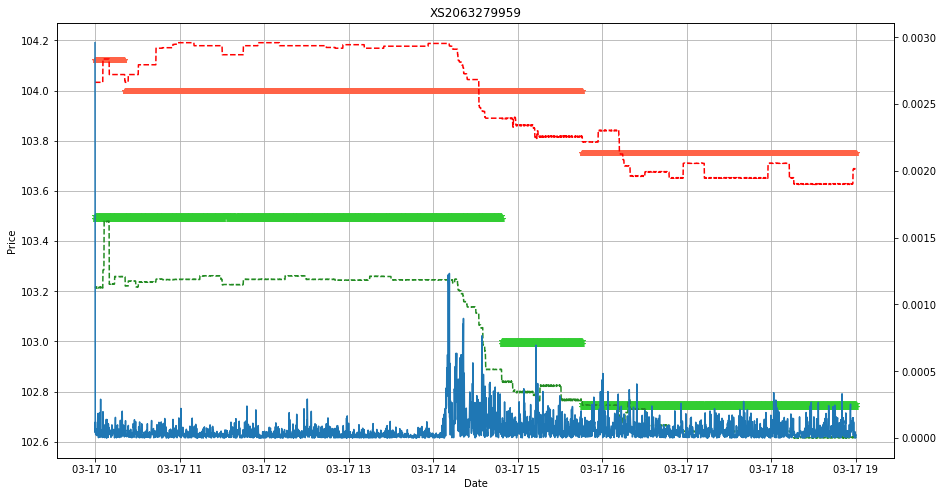

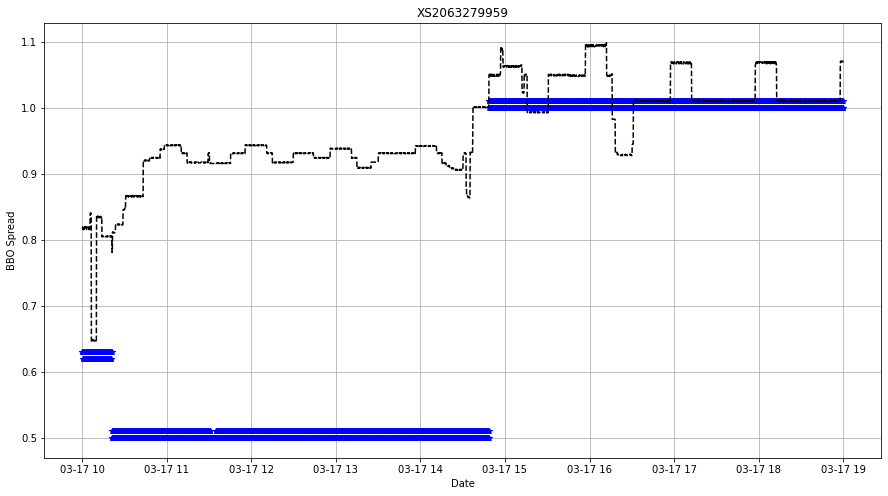

In [12]:
### selection parameters:
dt_start = dt.datetime.now() - dt.timedelta(365)
dt_end   = dt.datetime.now() + dt.timedelta(1)
# dt_start = dt.datetime(2021,1,21)
# dt_end   = dt.datetime(2021,1,24)
dt_start = dt.datetime(2021,3,17)
dt_end   = dt.datetime(2021,3,18)
# dt_start = dt.datetime(2021,4,15)
# dt_end   = dt.datetime(2021,4,17)

# select data
quotes = data.copy()
quotes['Time'] = quotes['Date'].apply(lambda x: x.time())
quotes = quotes[quotes['Time'] >= dt.time(10,0,0)]
quotes = quotes[quotes['Time'] <= dt.time(19,0,0)]
quotes = quotes[quotes['Date'] >= dt_start]
quotes = quotes[quotes['Date'] <= dt_end]
# plot selection
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set(xlabel='Date', ylabel='Price', title=isin)
ax.plot(quotes['Date'], quotes['bid_sber'].astype(np.float), '*', color='limegreen')
ax.plot(quotes['Date'], quotes['ask_sber'].astype(np.float), '*', color='tomato')
ax.grid()
ax.plot(quotes['Date'], quotes['bid_cbbt'].astype(np.float), '--', color='forestgreen')
ax.plot(quotes['Date'], quotes['ask_cbbt'].astype(np.float), '--', color='red')
# from matplotlib.dates import MONDAY, DateFormatter, DayLocator, WeekdayLocator
# mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
# alldays = DayLocator()
# ax.xaxis.set_major_locator(mondays)
# ax.xaxis.set_minor_locator(alldays)
ax=ax.twinx()
ax.plot(quotes['Date'], quotes['rub_chg'].astype(np.float))
# ax.plot(quotes['Date'],  quotes['ask'].astype(np.float) - quotes['bid'].astype(np.float), color='grey')
# ax.plot(quotes['Date'],  quotes['ask_cbbt'].astype(np.float) - quotes['bid_cbbt'].astype(np.float), "--", color='k')

# fig.savefig(isin + ".png")
plt.show()


# plot selection
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set(xlabel='Date', ylabel='BBO Spread', title=isin)
ax.grid()
ax.plot(quotes['Date'],  quotes['ask_sber'].astype(np.float) - quotes['bid_sber'].astype(np.float), '*', color='b')
ax.plot(quotes['Date'],  quotes['ask_cbbt'].astype(np.float) - quotes['bid_cbbt'].astype(np.float), "--", color='k')
# fig.savefig(isin + ".png")
plt.show()

In [13]:
# Cbbt -> our quotes adj to currency
spread_periods = spread_period * 6 # minutes to periods
crncy = curncy.copy()
crncy['log_chg'] = np.log(crncy['rub']/crncy['rub'].shift(1))
crncy['vol_per'] = crncy['log_chg'].rolling(window=spread_periods).std()*np.sqrt(spread_periods)
crncy['log_abs'] = abs(np.log(curncy['rub'] / curncy['rub'].shift(diff_period)))
crncy['max_chg'] = crncy['log_abs'].rolling(spread_periods).max()
crncy['sprd'] = crncy.dropna()[crncy_param].apply(lambda x: (max(min_crncy_vol,min(max_crncy_vol-0.000001,x))//step_crncy_vol - min_crncy_vol//step_crncy_vol) * spread_step + spread_base)
crncy['sprd'] = crncy['sprd'].fillna(method = 'ffill').fillna(spread_base)
crncy

,Dates,rub,rub_chg,log_chg,vol_per,log_abs,max_chg,sprd
0,2020-11-05 10:00:50,78.5105,NaN,NaN,NaN,NaN,NaN,0.5
1,2020-11-05 10:01:00,78.5267,0.000206,0.000206,NaN,0.000206,NaN,0.5
2,2020-11-05 10:01:10,78.4718,0.000699,-0.000699,NaN,0.000699,NaN,0.5
3,2020-11-05 10:01:20,78.4160,0.000711,-0.000711,NaN,0.000711,NaN,0.5
4,2020-11-05 10:01:30,78.4296,0.000173,0.000173,NaN,0.000173,NaN,0.5
...,...,...,...,...,...,...,...,...
664535,2021-05-19 16:17:50,73.7775,0.000024,0.000024,0.001139,0.000024,0.000276,0.5
664536,2021-05-19 16:18:00,73.7789,0.000019,0.000019,0.001139,0.000019,0.000276,0.5
664537,2021-05-19 16:18:10,73.7816,0.000037,0.000037,0.001140,0.000037,0.000276,0.5
664538,2021-05-19 16:18:20,73.7863,0.000064,0.000064,0.001141,0.000064,0.000276,0.5


In [14]:
data = data.join(crncy.set_index('Dates')['sprd'], how='left')
data['sprd'] = data['sprd'].fillna(method = 'ffill').fillna(spread_base)
data['mid_cbbt'] = round((data['bid_cbbt'] + data['ask_cbbt'])/2/spread_step)*spread_step
data['bid_adj'] = data['mid_cbbt'] - data['sprd']/2
data['ask_adj'] = data['mid_cbbt'] + data['sprd']/2
data

,rub,bid,ask,bid_cbbt,ask_cbbt,bid_sber,ask_sber,rub_chg,Date,sprd,mid_cbbt,bid_adj,ask_adj
2020-11-05 10:00:50,78.5105,99.0,99.75,NaN,NaN,NaN,NaN,NaN,2020-11-05 10:00:50,0.5,NaN,NaN,NaN
2020-11-05 10:01:00,78.5267,99.0,99.75,NaN,NaN,NaN,NaN,0.000206,2020-11-05 10:01:00,0.5,NaN,NaN,NaN
2020-11-05 10:01:10,78.4718,99.0,99.75,NaN,NaN,NaN,NaN,0.000699,2020-11-05 10:01:10,0.5,NaN,NaN,NaN
2020-11-05 10:01:20,78.4160,99.0,99.75,NaN,NaN,NaN,NaN,0.000711,2020-11-05 10:01:20,0.5,NaN,NaN,NaN
2020-11-05 10:01:30,78.4296,99.0,99.75,NaN,NaN,NaN,NaN,0.000173,2020-11-05 10:01:30,0.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-24 10:17:50,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:17:50,0.5,103.875,103.625,104.125
2021-05-24 10:18:00,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:18:00,0.5,103.875,103.625,104.125
2021-05-24 10:18:20,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:18:20,0.5,103.875,103.625,104.125
2021-05-24 10:18:40,NaN,103.0,103.75,103.493,104.346,103.75,104.25,0.000011,2021-05-24 10:18:40,0.5,103.875,103.625,104.125


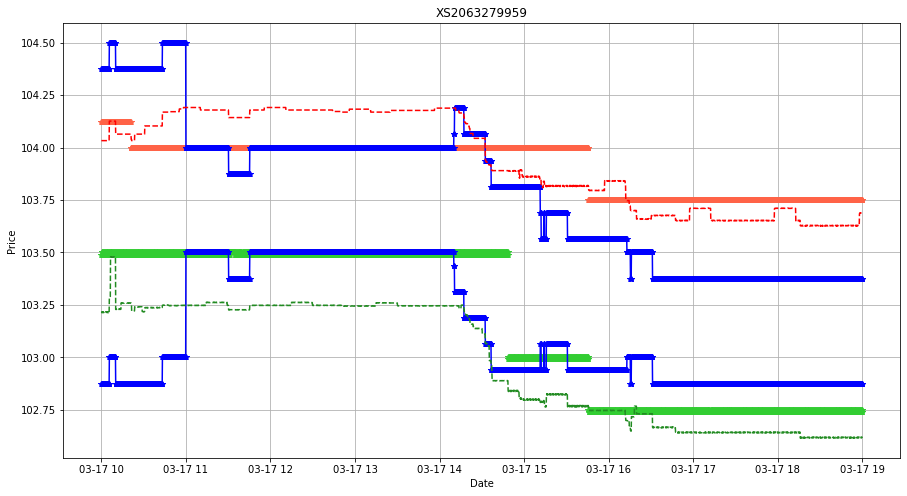

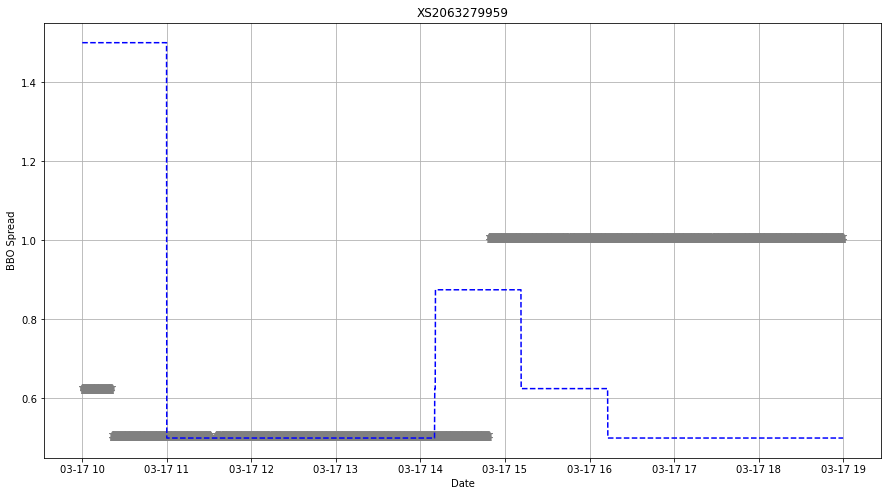

In [15]:
# selection parameters:
dt_start = dt.datetime.now() - dt.timedelta(365)
dt_end   = dt.datetime.now() + dt.timedelta(1)
# dt_start = dt.datetime(2020,11, 9)
# dt_end   = dt.datetime(2020,11,10)
# dt_start = dt.datetime(2021,1,14)
# dt_end   = dt.datetime(2021,1,15)
dt_start = dt.datetime(2021,3,17)
dt_end   = dt.datetime(2021,3,18)
# dt_start = dt.datetime(2021,4,7)
# dt_end   = dt.datetime(2021,4,8)

# select data
quotes = data.copy()
quotes['Time'] = quotes['Date'].apply(lambda x: x.time())
quotes = quotes[quotes['Time'] >= dt.time(10,0,0)]
quotes = quotes[quotes['Time'] <= dt.time(19,0,0)]
quotes = quotes[quotes['Date'] >= dt_start]
quotes = quotes[quotes['Date'] <= dt_end]
# plot selection
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set(xlabel='Date', ylabel='Price', title=isin)
ax.plot(quotes['Date'], quotes['bid_sber'].astype(np.float), '*', color='limegreen')
ax.plot(quotes['Date'], quotes['ask_sber'].astype(np.float), '*', color='tomato')
ax.grid()
ax.plot(quotes['Date'], quotes['bid_adj'].astype(np.float), '-*', color='b')
ax.plot(quotes['Date'], quotes['ask_adj'].astype(np.float), '-*', color='b')

ax.plot(quotes['Date'], quotes['bid_cbbt'].astype(np.float), '--', color='forestgreen')
ax.plot(quotes['Date'], quotes['ask_cbbt'].astype(np.float), '--', color='red')

# ax=ax.twinx()
# ax.plot(quotes['Date'], quotes['sprd'].astype(np.float), color='grey')

# ax.plot(quotes['Date'],  quotes['ask'].astype(np.float) - quotes['bid'].astype(np.float), color='grey')
# ax.plot(quotes['Date'],  quotes['ask_cbbt'].astype(np.float) - quotes['bid_cbbt'].astype(np.float), "--", color='k')

# fig.savefig(isin + ".png")
plt.show()

# plot spread
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set(xlabel='Date', ylabel='BBO Spread', title=isin)
ax.grid()
ax.plot(quotes['Date'],  quotes['ask_sber'].astype(np.float) - quotes['bid_sber'].astype(np.float), '*', color='grey')
ax.plot(quotes['Date'],  quotes['ask_adj'].astype(np.float) - quotes['bid_adj'].astype(np.float), "--", color='b')
# fig.savefig(isin + ".png")
plt.show()

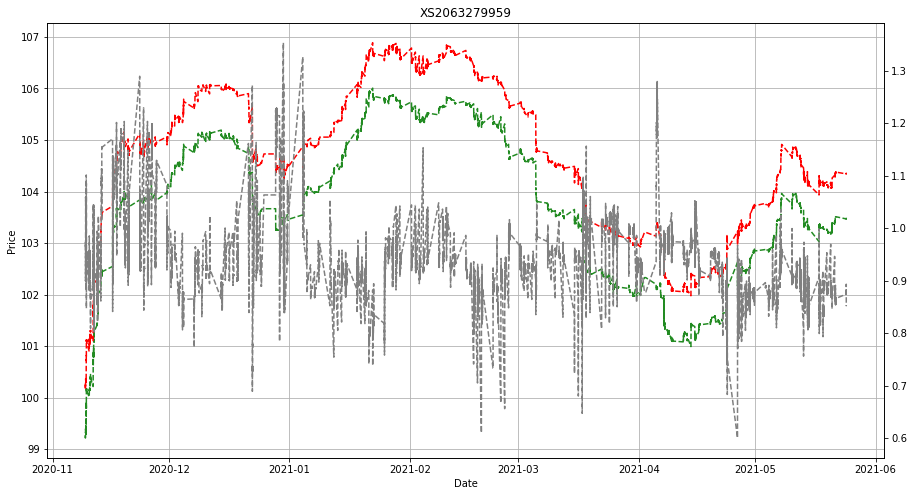

In [16]:
# selection parameters:
dt_start = dt.datetime.now() - dt.timedelta(365)
dt_end   = dt.datetime.now() + dt.timedelta(1)
# dt_start = dt.datetime(2021,1,21)
# dt_end   = dt.datetime(2021,1,24)
# dt_start = dt.datetime(2021,1,5)
# dt_end   = dt.datetime(2021,1,10)
# dt_start = dt.datetime(2021,4,7)
# dt_end   = dt.datetime(2021,4,8)

# select data
quotes = data.copy()
quotes['Time'] = quotes['Date'].apply(lambda x: x.time())
quotes = quotes[quotes['Time'] >= dt.time(10,0,0)]
quotes = quotes[quotes['Time'] <= dt.time(19,0,0)]
quotes = quotes[quotes['Date'] >= dt_start]
quotes = quotes[quotes['Date'] <= dt_end]
# plot selection
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set(xlabel='Date', ylabel='Price', title=isin)
# ax.plot(quotes['Date'], quotes['bid_sber'].astype(np.float), '*', color='limegreen')
# ax.plot(quotes['Date'], quotes['ask_sber'].astype(np.float), '*', color='tomato')
ax.grid()
# ax.plot(quotes['Date'], quotes['bid_adj'].astype(np.float), '-*', color='b')
# ax.plot(quotes['Date'], quotes['ask_adj'].astype(np.float), '-*', color='b')

ax.plot(quotes['Date'], quotes['bid_cbbt'].astype(np.float), '--', color='forestgreen')
ax.plot(quotes['Date'], quotes['ask_cbbt'].astype(np.float), '--', color='red')

ax=ax.twinx()
# ax.plot(quotes['Date'], quotes['sprd'].astype(np.float), color='b')

# ax.plot(quotes['Date'],  quotes['ask'].astype(np.float) - quotes['bid'].astype(np.float), color='grey')
ax.plot(quotes['Date'],  quotes['ask_cbbt'].astype(np.float) - quotes['bid_cbbt'].astype(np.float), "--", color='grey')

plt.show()

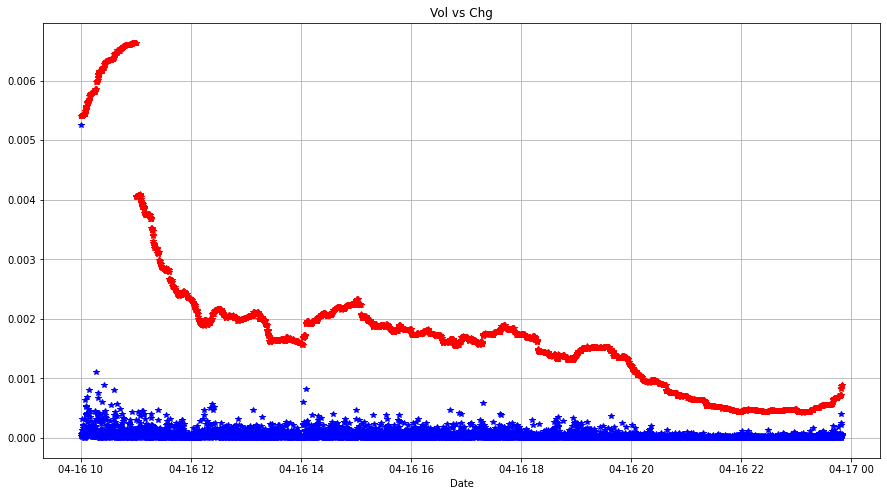

In [17]:
# crncy

# dt_start = dt.datetime.now() - dt.timedelta(365)
# dt_end   = dt.datetime.now() + dt.timedelta(1)
# dt_start = dt.datetime(2021,1,5)
# dt_end   = dt.datetime(2021,1,6)
dt_start = dt.datetime(2021,4,16)
dt_end   = dt.datetime(2021,4,17)

# select data
quotes = crncy.copy().rename(columns = {'Dates':"Date"})
# quotes['Time'] = quotes['Date'].apply(lambda x: x.time())
# quotes = quotes[quotes['Time'] >= dt.time(10,0,0)]
# quotes = quotes[quotes['Time'] <= dt.time(19,0,0)]
quotes = quotes[quotes['Date'] >= dt_start]
quotes = quotes[quotes['Date'] <= dt_end]

# plot selection
fig = plt.figure(figsize=(15,8))
ax = plt.subplot()
ax.set(xlabel='Date', title='Vol vs Chg')
ax.grid()
ax.plot(quotes['Date'], quotes['vol_per'].astype(np.float),'*', color = 'r')
ax.plot(quotes['Date'], quotes['rub_chg'].astype(np.float),'*', color = 'b')
# ax=ax.twinx()
# ax.plot(crncy.dropna()['Dates'], crncy.dropna()['vol_per'].apply(lambda x: (max(0,min(0.004999,x))+0.000)//0.001+1),'*', color = 'b')
# fig.savefig(isin + ".png")
plt.show()


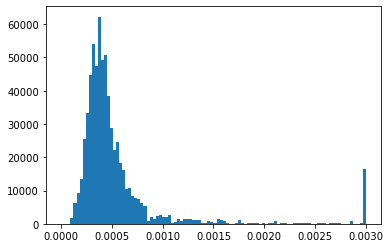

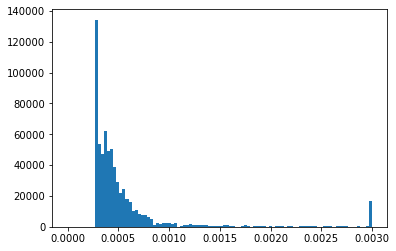

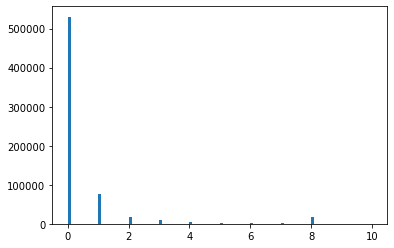

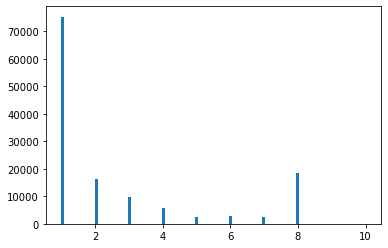

In [18]:
param = 'max_chg' # 'vol_per'
# min_crncy_vol = 0.0003
# max_crncy_vol = 0.0030
# step_crncy_vol= 0.0003
# show vol hist
plt.hist(crncy.dropna()[param].apply(lambda x: max(0,min(max_crncy_vol,x))), bins = 100, range = (0,max_crncy_vol))
plt.show()

plt.hist(crncy.dropna()[param].apply(lambda x: max(min_crncy_vol,min(max_crncy_vol,x))), bins = 100, range = (0,max_crncy_vol))
plt.show()

plt.hist(crncy.dropna()[param].apply(lambda x: max(min_crncy_vol,min(max_crncy_vol-0.0000001,x))//step_crncy_vol - min_crncy_vol//step_crncy_vol), bins = 100, range = (0,(max_crncy_vol-min_crncy_vol)//step_crncy_vol+1))
plt.show()

plt.hist(crncy.dropna()[param].apply(lambda x: max(min_crncy_vol,min(max_crncy_vol-0.0000001,x))//step_crncy_vol - min_crncy_vol//step_crncy_vol), bins = 100, range = (1,(max_crncy_vol-min_crncy_vol)//step_crncy_vol+1))
plt.show()

In [ ]:
# isins = pd.DataFrame(all_quotes['isin'].drop_duplicates()).sort_values(by=['isin'])
# isins.to_csv('isins.csv', sep=';')
# quotes.to_csv('quotes.csv', sep=';')